In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def draw(x1, y1, lableX, labelY, tableName):
        fig = plt.figure(figsize = (10, 5))
        
        plt.bar(x1, y1, color ='maroon', 
                width = 0.4)
        
        plt.xlabel(lableX)
        plt.ylabel(labelY)
        plt.title(tableName)
        plt.show()

In [3]:
def draw_rotation(x1, y1, lableX, labelY, tableName, n):
        fig = plt.figure(figsize = (10, 5))
        plt.bar(x1, y1, color ='maroon', 
                width = 0.4)
        fig.autofmt_xdate(rotation=n)
        plt.xlabel(lableX)
        plt.ylabel(labelY)
        plt.title(tableName)
        #plt.yscale("log")
        plt.show()

In [4]:
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [26]:
df[df['Operator']=='French Air Force']

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary


In [5]:
operators = df[df['Operator'].str.contains('Military', na = False)]['Operator']

In [7]:
militaryOperators = {}
for op in operators:
    if not(op in militaryOperators):
        militaryOperators[op] = 0
    militaryOperators[op]+=1

In [8]:
militaryOperators

{'Military - U.S. Army': 23,
 'Military - U.S. Navy': 36,
 'Military - German Navy': 15,
 'Military - German Army': 3,
 'Military - Royal Australian Air Force': 11,
 'Military - Royal Airship Works': 1,
 'Military - U.S. Army Air Service': 1,
 'Military - French Navy': 1,
 'Maddux Airlines / Military - U.S.Army Air Force': 1,
 'Military - British Air Ministry': 1,
 'Military - U.S. Navy / Military - U.S. Navy': 2,
 'Military - Colombian Army': 2,
 'Military - Ecuadorian Air Force': 2,
 'Military -Royal Air Force': 22,
 'Military - Royal Air Force': 36,
 'Military - U.S. Army Air Force': 1,
 'Military - U.S. Army Air Forces': 43,
 'American Airlines / Military - USAF': 1,
 'Military - U.S. Air Force': 176,
 'Military - Royal Canadian Air Force': 6,
 'Military - Indian Air Force': 16,
 'Military - U.S. Army Air Forces / Military - U.S. Army Air Forces': 1,
 'Military - Royal Netherlands East Indies Air Force': 1,
 'Military - U.S. Army Air Corps': 2,
 'Military - United States Army Air F

In [9]:
topCountries = pd.read_excel('MilitaryUnited.xlsx')

In [10]:
topCountries

,United States of America,Russian Federation/USSR,France,United Kingdom,Afghanistan,Brazil,Philippines,India,Angola,Sri Lanka,Germany/West Germany
0,American Airlines / Military - USAF,Aeroflot / Military - Russian Air Force,Forces Militaires Françaises,British European Airways / Military - British,Military - Afghan Republican Air Force,Brazilian Air Force,Philippine Air Force,Indian Air Force,Angolan Air Force,Sri Lanka Air Force,Deutsche Luftwaffe
1,Eastern Air Lines / Military - U.S. Army Air C...,Aeroflot /Military - Russian,French Air Force,British European Airways / Military - Soviet A...,NaN,Força Aérea Brasileira,NaN,Indian Navy,Angolan Air Force,NaN,German Air National Guard
2,Eastern Air Lines / Military - USN,Russian,French Naval Aviation,British Air Ministry,NaN,NaN,NaN,NaN,Angolan Armed Forces,NaN,German Army
3,Hughes Airwest / Military - US Marine Air Corps,Russian Air Force,French Navy,Royal Air Force,NaN,NaN,NaN,NaN,NaN,NaN,German Navy
4,Maddux Airlines / Military - U.S.Army Air Force,Russian Air Force / Military - Russian Air Force,NaN,Royal Airship Works,NaN,NaN,NaN,NaN,NaN,NaN,West German Air Force
5,Military - (2) U.S. Army Air Forces,Russian Air Force/Uzbekistan Airways,NaN,Royal British Navy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Florida Army National Guard,Russian Army,NaN,Royal Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,U. S. Air Force,Russian Navy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,U. S. Navy,"Russian, cargo",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,U.S. Air Force / Military - U.S. Navy,Soviet Air Force - Aeroflot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def allOccurances(arr, name):
    if type(name) != type('abc'):
        return 0
    totalSum = 0
    for element in arr:
        if element.endswith(name):
            totalSum += 1
    
    return totalSum

In [50]:
finalData = {}

for country in topCountries.columns:
    finalData[country] = 0
    for name in topCountries[country]:
        finalData[country] += allOccurances(operators, name)


In [51]:
finalData

{'United States of America': 404,
 'Russian Federation/USSR': 26,
 'France': 14,
 'United Kingdom': 122,
 'Afghanistan': 15,
 'Brazil': 11,
 'Philippines': 7,
 'India': 19,
 'Angola': 9,
 'Sri Lanka': 7,
 'Germany/West Germany': 21}

In [40]:
yCoord = []
for country in topCountries.columns:
    yCoord.append(0)
    for name in topCountries[country].dropna():
        yCoord[-1]+=int(df[df['Operator'].str.endswith(name, na=False)]['Fatalities'].sum())

yCoord

[8927, 1279, 332, 2246, 578, 213, 194, 481, 236, 273, 459]

In [39]:
topCountries.columns

Index(['United States of America', 'Russian Federation/USSR', 'France',
       'United Kingdom', 'Afghanistan', 'Brazil', 'Philippines', 'India',
       'Angola', 'Sri Lanka', 'Germany/West Germany'],
      dtype='object')

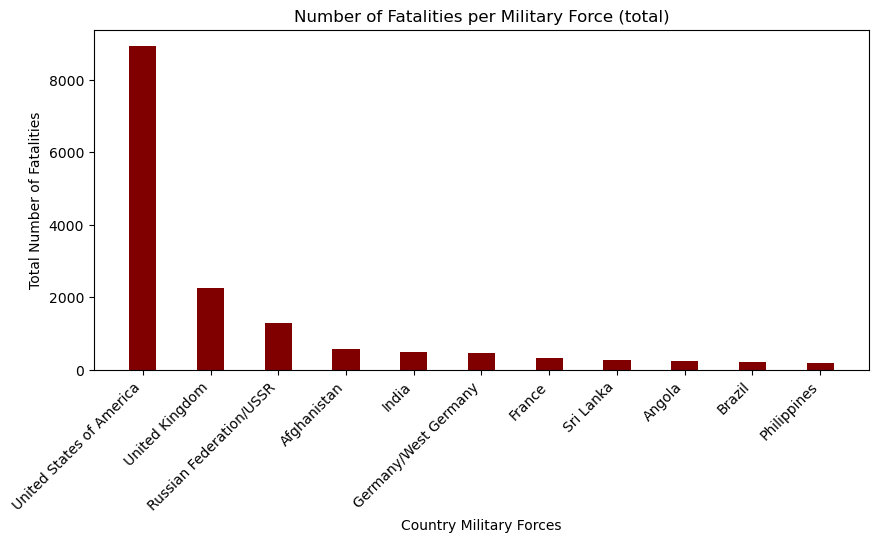

In [41]:
xCoord = topCountries.columns
yCoord, xCoord = zip(*sorted(zip(yCoord, xCoord)))
xCoord = xCoord[::-1]
yCoord = yCoord[::-1]
#= sorted(finalData.items(), key=lambda x: -x[1])
draw_rotation(xCoord, yCoord, 'Country Military Forces', 'Total Number of Fatalities', 'Number of Fatalities per Military Force (total)', 45)

In [62]:
#[final_data[x][0] for x in range(len(final_data))], [final_data[x][1] for x in range(len(final_data))]
xCoord = [final_data[x][0] for x in range(7)]
yCoord = [final_data[x][1] for x in range(7)]

xCoord.append('Others')
yCoord.append(781-sum(yCoord))

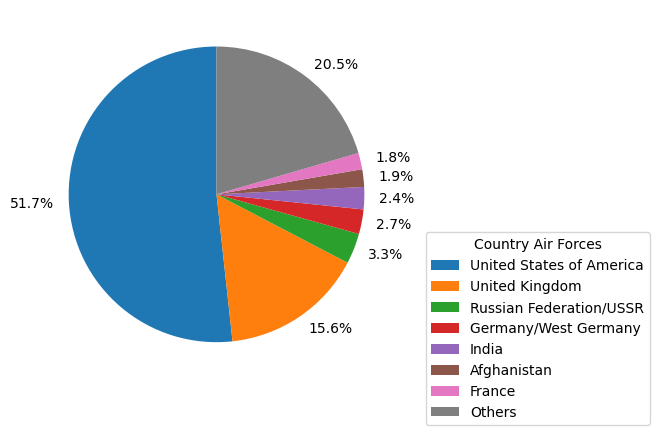

In [92]:
myexplode = [0.1]*len(xCoord)
plt.pie(yCoord, labels = [str(round((x/781)*100, 1)) + "%" for x in yCoord], startangle = 90)
#plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          #bbox_transform=plt.gcf().transFigure)
plt.legend(labels = xCoord, title = "Country Air Forces", loc="lower right", bbox_to_anchor=(1.2,0), bbox_transform=plt.gcf().transFigure)
plt.show()

In [32]:
importantOperators = []
for op in operators:
    if militaryOperators[op] > 6:
        importantOperators.append(op)

importantOperators = list(set(importantOperators))

In [33]:
importantOperators

['Military - U.S. Marine Corps',
 'Military -Royal Air Force',
 'Military - Philippine Air Force',
 'Military - Indian Air Force',
 'Military - French Air Force',
 'Military - Sri Lanka Air Force',
 'Military - U.S. Navy',
 'Military - Royal Air Force',
 'Military - Afghan Republican Air Force',
 'Military - Angolan Air Force',
 'Military - Royal Australian Air Force',
 'Military - German Navy',
 'Military - U.S. Army',
 'Military - Russian Air Force',
 'Military - U.S. Air Force',
 'Military - Brazilian Air Force',
 'Military - Soviet Air Force',
 'Military - U.S. Army Air Forces']

In [14]:
operators

{'Aeroflot / Military - Russian Air Force',
 'Aeroflot /Military - Russian',
 'American Airlines / Military - USAF',
 'British European Airways / Military - British',
 'British European Airways / Military - Soviet Air Force',
 'Capital Airlines / Military - Air National Guard',
 'Cubana de Aviacion / Military -  US Navy',
 'Eastern Air Lines / Military - Bolivian Air Force',
 'Eastern Air Lines / Military - U.S. Army Air Corps',
 'Eastern Air Lines / Military - USN',
 'Hughes Airwest  / Military - US Marine Air Corps',
 'Iran Air Tours  /  Military - Iranian Air Force',
 'Libya Arab Airlines / Military -  Libya Air Force',
 'Maddux Airlines / Military - U.S.Army Air Force',
 'Middle East Airlines / Military - Turkish Air ForceC-47',
 'Military -  (2) U.S. Army Air Forces',
 'Military - Afghan Republican Air Force',
 'Military - Algerian Air Force',
 'Military - Angolan  Air Force',
 'Military - Angolan Air Force',
 'Military - Angolan Armed Forces',
 'Military - Argentine Air Force',
 

In [76]:
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [77]:
df['Operator'] = df['Operator'].str.lower()
number_of_deaths = sum(df['Fatalities'])

military_deaths = {}

civil_deaths = {}

military_accidents = {}

civil_accidents = {}

ratio_civil = {}

ratio_military = {}

all_deaths_military = []

for i in range(1908, 2010):
    military_accidents[i] = 0
    civil_accidents[i] = 0
    military_deaths[i] = 0
    civil_deaths[i] = 0
    ratio_military[i] = 0
    ratio_civil[i] = 0

for i in range(len(df)):
    if type(df['Operator'][i]) == str:
        if 'military' in df['Operator'][i]:
            military_accidents[int(df['Date'][i][6:10])] += 1
            military_deaths[int(df['Date'][i][6:10])] += df['Fatalities'][i]
            try:
                all_deaths_military.append(int(df['Fatalities'][i]))
            except:
                pass
        else:
            civil_accidents[int(df['Date'][i][6:10])] += 1
            civil_deaths[int(df['Date'][i][6:10])] += df['Fatalities'][i]

    if type(df['Location'][i]) == str:
        df['Location'][i] = re.sub(r'[^\w\s]', '', df['Location'][i])



<ipython-input-77-9dd06d45cb01>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'][i] = re.sub(r'[^\w\s]', '', df['Location'][i])


In [78]:
for i in military_deaths:
    if military_accidents[i] != 0:
        ratio_military[i] = military_deaths[i] / military_accidents[i]
    if civil_accidents[i] != 0:
        ratio_civil[i] = civil_deaths[i] / civil_accidents[i]


In [79]:
civil_max = max(civil_deaths.values())
civil_max_years = []
military_max = max(military_deaths.values())
military_max_years = []

for i in military_deaths.keys():
    if military_deaths[i] > 600:
        military_max_years.append(i)

    if civil_deaths[i] > 2400:
        civil_max_years.append(i)


In [80]:
print(civil_max, civil_max_years)
print(military_max, military_max_years)

2595.0 [1972, 1985]
1044.0 [1945, 1968, 1992]


In [81]:
reasons_civil = []
reasons_military1 = []
reasons_military2 = []
reasons_military3 = []

location_military1 = []
location_military2 = []
location_military3 = []

two_biggest3 = []

deaths_military_3 = []

for i in range(len(df)):
    if type(df['Operator'][i]) == str:
        if df['Date'][i][6:10] == str(civil_max_years[0]):
            if not 'military' in df['Operator'][i]:
                reasons_civil.append(df['Summary'][i])

        if df['Date'][i][6:10] == str(military_max_years[0]):
            if 'military' in df['Operator'][i]:
                reasons_military1.append(df['Summary'][i])
                location_military1.append(df['Location'][i])

        if df['Date'][i][6:10] == str(military_max_years[1]):
            if 'military' in df['Operator'][i]:
                reasons_military2.append(df['Summary'][i])
                location_military2.append(df['Location'][i])

        if df['Date'][i][6:10] == str(military_max_years[2]):
            if 'military' in df['Operator'][i]:
                reasons_military3.append(df['Summary'][i])
                location_military3.append(df['Location'][i])
                deaths_military_3.append(df['Fatalities'][i])
                if int(df['Fatalities'][i]) >= 157:
                    two_biggest3.append((df['Summary'][i], df['Location'][i]))

k = 0
while k < len(reasons_civil):
    if type(reasons_civil[k]) != str:
        reasons_civil.pop(k)
    else:
        k += 1

k = 0
while k < len(reasons_military1):
    if type(reasons_military1[k]) != str:
        reasons_military1.pop(k)
    else:
        k += 1

k = 0
while k < len(reasons_military2):
    if type(reasons_military2[k]) != str:
        reasons_military2.pop(k)
    else:
        k += 1

k = 0
while k < len(reasons_military3):
    if type(reasons_military3[k]) != str:
        reasons_military3.pop(k)
    else:
        k += 1


In [82]:
keywords_military1 = {}
keywords_military2 = {}
keywords_military3 = {}

for i in range(len(location_military1)):
    s = location_military1[i].split(' ')
    for j in s:
        if j in keywords_military1:
            keywords_military1[j] += 1
        else:
            keywords_military1[j] = 1


for i in range(len(location_military2)):
    s = location_military2[i].split(' ')
    for j in s:
        if j in keywords_military2:
            keywords_military2[j] += 1
        else:
            keywords_military2[j] = 1


for i in range(len(location_military3)):
    s = location_military3[i].split(' ')
    for j in s:
        if j in keywords_military3:
            keywords_military3[j] += 1
        else:
            keywords_military3[j] = 1

In [83]:
sorted_keywrods_military2 = sorted(keywords_military2.items(), key=lambda x: -x[1])
sorted_keywrods_military2

[('Near', 13),
 ('Vietnam', 10),
 ('South', 6),
 ('Off', 2),
 ('Phu', 2),
 ('Quoc', 2),
 ('Russia', 2),
 ('Camp', 2),
 ('Evans', 2),
 ('Quang', 1),
 ('Tri', 1),
 ('Copper', 1),
 ('Canyon', 1),
 ('Nevada', 1),
 ('Minot', 1),
 ('AFB', 1),
 ('North', 1),
 ('Dakota', 1),
 ('Northern', 1),
 ('India', 1),
 ('Khe', 1),
 ('Sanh', 1),
 ('Saint', 1),
 ('Denis', 1),
 ('Reunion', 1),
 ('Moscow', 1),
 ('Mull', 1),
 ('of', 1),
 ('Kintyre', 1),
 ('England', 1),
 ('Cheo', 1),
 ('Reo', 1),
 ('Chaklala', 1),
 ('West', 1),
 ('Pakistan', 1),
 ('Got', 1),
 ('el', 1),
 ('Afraq', 1),
 ('Libya', 1),
 ('Kham', 1),
 ('Duc', 1),
 ('Yuhnov', 1),
 ('Bearcat', 1),
 ('Recife', 1),
 ('Brazil', 1),
 ('Wake', 1),
 ('Island', 1),
 ('Izmir', 1),
 ('Turkey', 1),
 ('Ban', 1),
 ('Me', 1),
 ('Thuot', 1)]

In [105]:
aircraft_models = {}

for i in range (len(df)):
    # print(type(df["Type"][i]))
    if type(df["Type"][i]) == str:
        if len(df["Type"][i].split('-')) > 1:
            s = df["Type"][i].split('-')[0] + '-' + df["Type"][i].split('-')[1]
        else:
            s = df["Type"][i].split('-')[0]
            
        if s in aircraft_models.keys():
            aircraft_models[s] += 1
        else:
            aircraft_models[s] = 1
aircraft_models = sorted(aircraft_models.items(), key=lambda x: -x[1])
# aircraft_models

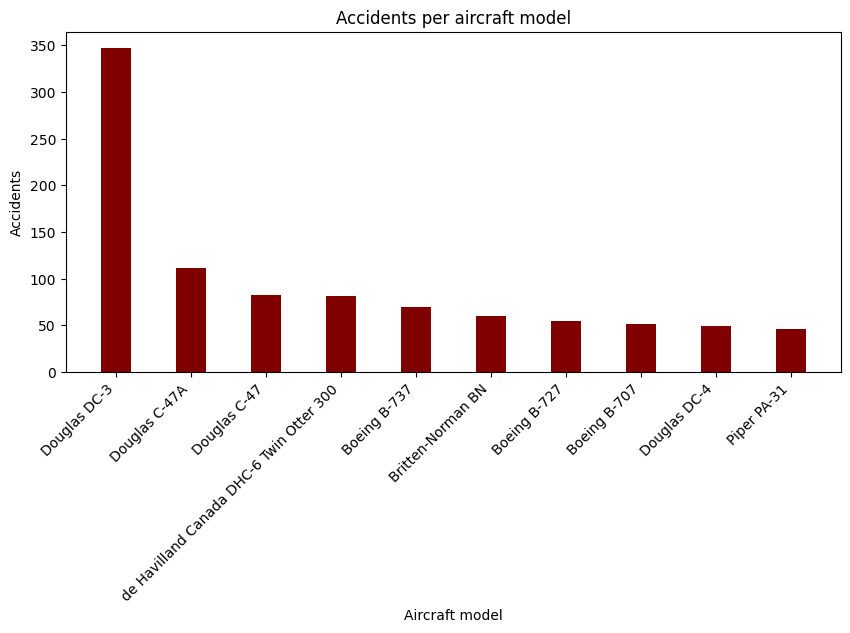

In [103]:
models_vis = {}
for i in range(len(aircraft_models)):
    if aircraft_models[i][1] > 43:
        models_vis[aircraft_models[i][0]] = aircraft_models[i][1]
# models_vis
draw_rotation(list(models_vis.keys()), list(models_vis.values()), "Aircraft model", "Accidents", "Accidents per aircraft model", 45)